# REST API

In [1]:
import config
import requests
from bs4 import BeautifulSoup
import urllib

In [ ]:
url='파라미터와 주소가 길게 있었다 보안상 삭제'
resp = requests.get(url)
resp.url

In [ ]:
resp

In [ ]:
resp.text

In [ ]:
urllib.parse.urlparse(url)

In [2]:
#encoding - > decoding 하는 것..?
#%들이 특수문자로 치환된다
api_key=urllib.parse.unquote(config.api_key)

In [3]:
url = 'http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList'
params={
    'hjdCd':'1168058000',
    'stDt':'20190501',
    'edDt':'20190531',
    'numOfRows':10,
    'pageNo':1,
    'serviceKey':api_key
}


In [4]:
resp=requests.get(url,params=params)
resp.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.26</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.2</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrst>정상</anlrst><anlval>-0.55</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrs

In [5]:
#xml - > BeautifulSoup으로 해준다
#lxml이 안되는 이유는..?
#pip install lxml
soup = BeautifulSoup(resp.text)
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190501</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.21</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190502</anldt><anlrst>정상</anlrst><anlval>-0.18</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.26</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190503</anldt><anlrst>정상</anlrst><anlval>-0.2</anlval><dv>SPI6</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrst>정상</anlrst><anlval>-0.55</anlval><dv>SPI3</dv><hjdcd>1168058000</hjdcd></item><item><anldt>20190504</anldt><anlrst

In [6]:
header = soup.find('header')
body = soup.find('body')

In [7]:
result_code = header.find('resultcode').text
result_msg = header.find('resultmsg').text
result_code,result_msg

('00', 'NORMAL SERVICE.')

In [8]:
num_of_rows = body.find('numofrows').text
page_no = body.find('pageno').text
total_count = body.find('totalcount').text
num_of_rows,page_no,total_count

('10', '1', '62')

In [9]:
items = body.find_all('item')

result_list = []
for item in items:
    result_list.append({
        'anldt':item.find('anldt').text,
        'anlrst':item.find('anlrst').text,
        'anlval':item.find('dv').text,
        'hjdcd':item.find('hjdcd').text
    })
result_list

[{'anldt': '20190501',
  'anlrst': '정상',
  'anlval': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190501',
  'anlrst': '정상',
  'anlval': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190502',
  'anlrst': '정상',
  'anlval': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190502',
  'anlrst': '정상',
  'anlval': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190503',
  'anlrst': '정상',
  'anlval': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190503',
  'anlrst': '정상',
  'anlval': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190504',
  'anlrst': '정상',
  'anlval': 'SPI3',
  'hjdcd': '1168058000'},
 {'anldt': '20190504',
  'anlrst': '정상',
  'anlval': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190505',
  'anlrst': '정상',
  'anlval': 'SPI6',
  'hjdcd': '1168058000'},
 {'anldt': '20190505',
  'anlrst': '정상',
  'anlval': 'SPI3',
  'hjdcd': '1168058000'}]

## json

In [10]:
import datetime
now = datetime.datetime.now()
today = now.strftime('%Y%m%d')

In [11]:
url = 'http://apis.data.go.kr/B500001/drghtIdexSpiAnals/analsInfoList'
params={
    'hjdCd':'1168058000',
    'stDt':'20130101',
    'edDt':today,
    'numOfRows':100000,
    'pageNo':1,
    'serviceKey':api_key,
    '_type':'json'
}
resp = requests.get(url,params=params)
resp.text

'{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL SERVICE."},"body":{"items":{"item":[{"anldt":20130101,"anlrst":"보통습윤","anlval":1.23,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130101,"anlrst":"보통습윤","anlval":1.38,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130102,"anlrst":"보통습윤","anlval":1.4,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130102,"anlrst":"보통습윤","anlval":1.08,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130103,"anlrst":"정상","anlval":0.73,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130103,"anlrst":"보통습윤","anlval":1.44,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130104,"anlrst":"보통습윤","anlval":1.42,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130104,"anlrst":"정상","anlval":0.76,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130105,"anlrst":"정상","anlval":0.8,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130105,"anlrst":"보통습윤","anlval":1.44,"dv":"SPI3","hjdcd":1168058000},{"anldt":20130106,"anlrst":"정상","anlval":0.84,"dv":"SPI6","hjdcd":1168058000},{"anldt":20130106,"anlrst":"보통습윤

In [12]:
data = resp.json()
data

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'},
  'body': {'items': {'item': [{'anldt': 20130101,
      'anlrst': '보통습윤',
      'anlval': 1.23,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130101,
      'anlrst': '보통습윤',
      'anlval': 1.38,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130102,
      'anlrst': '보통습윤',
      'anlval': 1.4,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130102,
      'anlrst': '보통습윤',
      'anlval': 1.08,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130103,
      'anlrst': '정상',
      'anlval': 0.73,
      'dv': 'SPI6',
      'hjdcd': 1168058000},
     {'anldt': 20130103,
      'anlrst': '보통습윤',
      'anlval': 1.44,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130104,
      'anlrst': '보통습윤',
      'anlval': 1.42,
      'dv': 'SPI3',
      'hjdcd': 1168058000},
     {'anldt': 20130104,
      'anlrst': '정상',
      'anlval': 0.76

In [13]:
import pandas as pd

In [14]:
items=data['response']['body']['items']['item']

In [15]:
dright_idx = pd.DataFrame(items)
dright_idx.head()

,anldt,anlrst,anlval,dv,hjdcd
0,20130101,보통습윤,1.23,SPI6,1168058000
1,20130101,보통습윤,1.38,SPI3,1168058000
2,20130102,보통습윤,1.4,SPI3,1168058000
3,20130102,보통습윤,1.08,SPI6,1168058000
4,20130103,정상,0.73,SPI6,1168058000


In [16]:
dright_idx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   anldt   5790 non-null   int64 
 1   anlrst  5790 non-null   object
 2   anlval  5790 non-null   object
 3   dv      5790 non-null   object
 4   hjdcd   5790 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 226.3+ KB


In [17]:
import numpy as np

In [18]:
dright_idx['anlval']=dright_idx['anlval'].astype(np.float64)

In [19]:
dright_idx.describe()

,anldt,anlval,hjdcd
count,5.790000e+03,5790.000000,5.790000e+03
mean,2.016535e+07,-0.325934,1.168058e+09
std,2.277571e+04,0.971831,0.000000e+00
min,2.013010e+07,-2.500000,1.168058e+09
25%,2.014123e+07,-1.150000,1.168058e+09
50%,2.016122e+07,-0.310000,1.168058e+09
75%,2.018121e+07,0.377500,1.168058e+09
max,2.020121e+07,2.400000,1.168058e+09


In [20]:
#!pip install matplotlib
import matplotlib.pyplot as plt

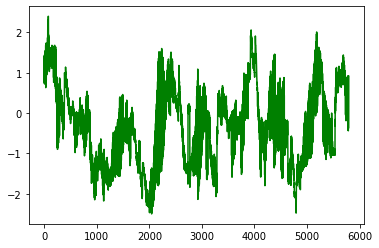

In [21]:
plt.plot(dright_idx['anlval'],'g')

(array([ 71.,  79., 152., 354., 553., 473., 325., 431., 490., 592., 513.,
        439., 290., 360., 244., 209., 144.,  52.,  15.,   4.]),
 array([-2.5  , -2.255, -2.01 , -1.765, -1.52 , -1.275, -1.03 , -0.785,
        -0.54 , -0.295, -0.05 ,  0.195,  0.44 ,  0.685,  0.93 ,  1.175,
         1.42 ,  1.665,  1.91 ,  2.155,  2.4  ]),
 <BarContainer object of 20 artists>)

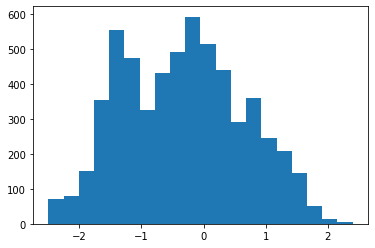

In [22]:
plt.hist(dright_idx['anlval'],bins=20)

In [23]:
dright_idx['anlrst'].value_counts()

정상      3494
보통가뭄     978
심한가뭄     581
보통습윤     413
심한습윤     158
극한가뭄     156
극한습윤      10
Name: anlrst, dtype: int64

<BarContainer object of 7 artists>

C:\Users\sjszz\.conda\envs\study1\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sjszz\.conda\envs\study1\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sjszz\.conda\envs\study1\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sjszz\.conda\envs\study1\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sjszz\.conda\envs\study1\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sjszz\.conda\envs\study1\lib\site-packages\matplotlib\backends\backend_

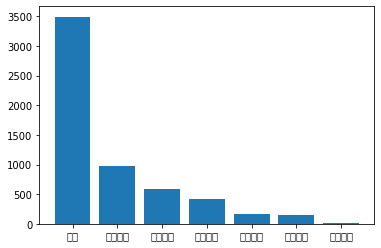

In [24]:
plt.bar(dright_idx['anlrst'].value_counts().index,dright_idx['anlrst'].value_counts().values)

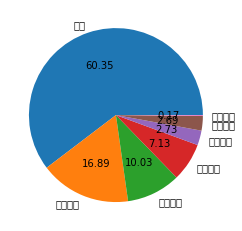

In [25]:
plt.pie(dright_idx['anlrst'].value_counts(),
       labels=dright_idx['anlrst'].value_counts().index,
       autopct="%.2f")
plt.show()

<AxesSubplot:>

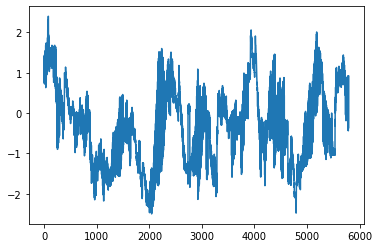

In [26]:
dright_idx['anlval'].plot()

# 네이버 POST 요청(데이터랩)

In [42]:
url = 'https://openapi.naver.com/v1/datalab/search'
headers={
     'X-Naver-Client-Id': config.naver_id,
    'X-Naver-Client-Secret': config.naver_secret,
    'Content-Type':'application/json'
}
params={
    'startDate':'2020-10-03',
    'endDate':'2020-12-03',
    'timeUnit':'date',
    'keywordGroups':[
        {
            'groupName':'코로나',
            'keywords':['코로나','코로나 현황','코로나 확진자']
        },
        {
            'groupName':'마스크',
            'keywords':['마스크','공적 마스크','KF 80','KF 94']
        }
    ]
}

In [43]:
type(params)

dict

In [44]:
import json

In [45]:
data = json.dumps(params)
data

'{"startDate": "2020-10-03", "endDate": "2020-12-03", "timeUnit": "date", "keywordGroups": [{"groupName": "\\ucf54\\ub85c\\ub098", "keywords": ["\\ucf54\\ub85c\\ub098", "\\ucf54\\ub85c\\ub098 \\ud604\\ud669", "\\ucf54\\ub85c\\ub098 \\ud655\\uc9c4\\uc790"]}, {"groupName": "\\ub9c8\\uc2a4\\ud06c", "keywords": ["\\ub9c8\\uc2a4\\ud06c", "\\uacf5\\uc801 \\ub9c8\\uc2a4\\ud06c", "KF 80", "KF 94"]}]}'

만약 data를 xml로 만들어서 보내야 할 경우 <br>
dicttoxml 라이브러리 설치 및 import 하요 사용. (상세내용 문서 참조)<br>
혹은 구글검색(how to convert dict to xml in python)

In [46]:
resp=requests.post(url,headers= headers,data=data)
resp

<Response [200]>

In [47]:
result = resp.json()

In [48]:
result

{'startDate': '2020-10-03',
 'endDate': '2020-12-03',
 'timeUnit': 'date',
 'results': [{'title': '코로나',
   'keywords': ['코로나', '코로나 현황', '코로나 확진자'],
   'data': [{'period': '2020-10-03', 'ratio': 18.17132},
    {'period': '2020-10-04', 'ratio': 18.01668},
    {'period': '2020-10-05', 'ratio': 23.52498},
    {'period': '2020-10-06', 'ratio': 20.85507},
    {'period': '2020-10-07', 'ratio': 21.66768},
    {'period': '2020-10-08', 'ratio': 20.76106},
    {'period': '2020-10-09', 'ratio': 15.84257},
    {'period': '2020-10-10', 'ratio': 15.1631},
    {'period': '2020-10-11', 'ratio': 21.76935},
    {'period': '2020-10-12', 'ratio': 23.55322},
    {'period': '2020-10-13', 'ratio': 21.47816},
    {'period': '2020-10-14', 'ratio': 24.38502},
    {'period': '2020-10-15', 'ratio': 22.14614},
    {'period': '2020-10-16', 'ratio': 20.71208},
    {'period': '2020-10-17', 'ratio': 14.62064},
    {'period': '2020-10-18', 'ratio': 14.12672},
    {'period': '2020-10-19', 'ratio': 16.7124},
    {'perio